# Assignment 14

In [30]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('../datasets/adult.csv')
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [31]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    print(chi2)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

### Assumption
I expect there to be correlation between education and marital status. marige can cost allot of money and people with a higher income might be able to afford it more easily.

In [32]:
dfContingencyTable = create_contingency_table(df, 'education','marital-status')
dfContingencyTable

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
marital-status,,,,,,,,,,,,,,,,
Divorced,172,192,63,17,31,101,98,280,361,843,56,2416,367,2,74,1560
Married-AF-spouse,1,0,0,0,0,0,0,2,2,6,1,15,0,0,1,9
Married-civ-spouse,525,545,199,125,271,541,349,697,1013,4136,403,7243,1527,30,596,4179
Married-spouse-absent,22,25,10,18,27,20,13,21,19,98,13,199,24,5,5,109
Never-married,525,913,348,50,128,158,220,522,539,2681,97,4671,635,38,139,4453
Separated,75,79,19,12,31,39,41,43,64,136,11,607,44,3,9,317
Widowed,69,58,18,25,21,96,35,36,63,125,13,633,60,5,10,251


### Conclusion
As expected there is a correlation between education and marital status

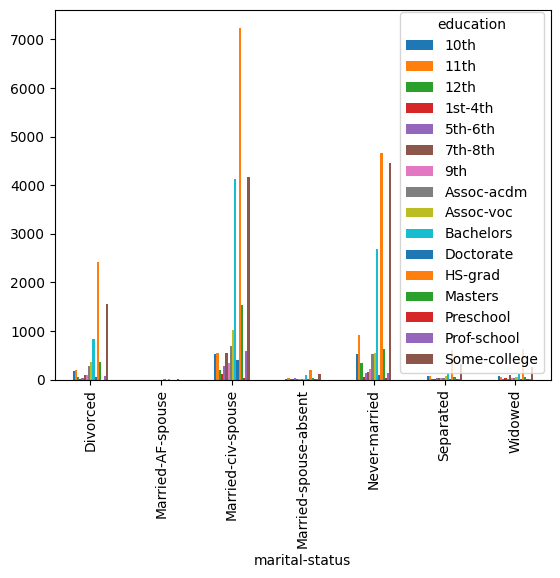

In [33]:
penguinsContingencyTable = create_contingency_table(df, 'education','marital-status').plot(kind='bar')

In [34]:
check_cat_vs_cat_correlation(df, 'education','marital-status')

Chi2ContingencyResult(statistic=np.float64(2423.187040866096), pvalue=np.float64(0.0), dof=90, expected_freq=array([[1.88633492e+02, 2.46079112e+02, 8.92240490e+01, 3.35438966e+01,
        6.91248720e+01, 1.29694013e+02, 1.02668769e+02, 2.17424205e+02,
        2.79894619e+02, 1.08983713e+03, 8.06683183e+01, 2.14355006e+03,
        3.60834548e+02, 1.12718357e+01, 1.13261578e+02, 1.47728950e+03],
       [1.05222964e+00, 1.37267106e+00, 4.97706892e-01, 1.87113550e-01,
        3.85590271e-01, 7.23455223e-01, 5.72703820e-01, 1.21282912e+00,
        1.56129970e+00, 6.07929651e+00, 4.49981573e-01, 1.19570861e+01,
        2.01279636e+00, 6.28762131e-02, 6.31792310e-01, 8.24057164e+00],
       [6.36428299e+02, 8.30243397e+02, 3.01031960e+02, 1.13173355e+02,
        2.33219586e+02, 4.37573093e+02, 3.46392941e+02, 7.33564944e+02,
        9.44333135e+02, 3.67698855e+03, 2.72165882e+02, 7.23209811e+03,
        1.21741540e+03, 3.80299128e+01, 3.82131895e+02, 4.98420953e+03],
       [1.78594652e+01, 

### Conclusion
The chi-squared test shows a statistically significant association between education and marital status. This means that the distribution of marital status varies depending on the level of education. While this does not imply a perfect or causal relationship, it does indicate that these two variables are not independent in the dataset.